## End-to-end Machine Learning project

Notebook adapted and inspired from: https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

In [1]:
# some imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

In [2]:
# to make this notebook's output identical at every run
np.random.seed(42)

## Get the data

In [3]:
housing = pd.read_csv('dataset/housing-snapshot/train_set.csv',index_col=0) 

In [4]:
housing.shape

(5432, 21)

In [5]:
housing.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
5,Coburg,4/34 Gladstone St,2,u,650000.0,S,Barry,29/04/2017,7.8,3058.0,2.0,1.0,1.0,136.0,81.0,1975.0,Moreland,-37.74490,144.97540,Northern Metropolitan,11204.0
6,Glen Iris,27 Pascoe St,3,h,1510000.0,PI,hockingstuart,10/09/2016,9.2,3146.0,3.0,2.0,2.0,370.0,NaN,NaN,Boroondara,-37.85970,145.08830,Southern Metropolitan,10412.0
7,Pascoe Vale,5/10 Dorset Rd,3,u,600000.0,S,Nelson,4/03/2017,9.9,3044.0,3.0,1.0,1.0,204.0,124.0,2008.0,Moreland,-37.72340,144.94970,Northern Metropolitan,7485.0
8,Preston,23 Dean St,4,h,1260000.0,SP,Nelson,14/05/2016,8.8,3072.0,4.0,3.0,2.0,654.0,150.0,1950.0,Darebin,-37.73650,145.01730,Northern Metropolitan,14577.0


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5431
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5432 non-null   object 
 1   Address        5432 non-null   object 
 2   Rooms          5432 non-null   int64  
 3   Type           5432 non-null   object 
 4   Price          5432 non-null   float64
 5   Method         5432 non-null   object 
 6   SellerG        5432 non-null   object 
 7   Date           5432 non-null   object 
 8   Distance       5432 non-null   float64
 9   Postcode       5432 non-null   float64
 10  Bedroom2       5432 non-null   float64
 11  Bathroom       5432 non-null   float64
 12  Car            5407 non-null   float64
 13  Landsize       5432 non-null   float64
 14  BuildingArea   2890 non-null   float64
 15  YearBuilt      3302 non-null   float64
 16  CouncilArea    4879 non-null   object 
 17  Lattitude      5432 non-null   float64
 18  Longtitu

In [7]:
housing["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

In [8]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [9]:
## POSTCODE IS NOT NUMERIC, we should change it to categorical
housing['Postcode'] = pd.Categorical(housing.Postcode)
housing.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


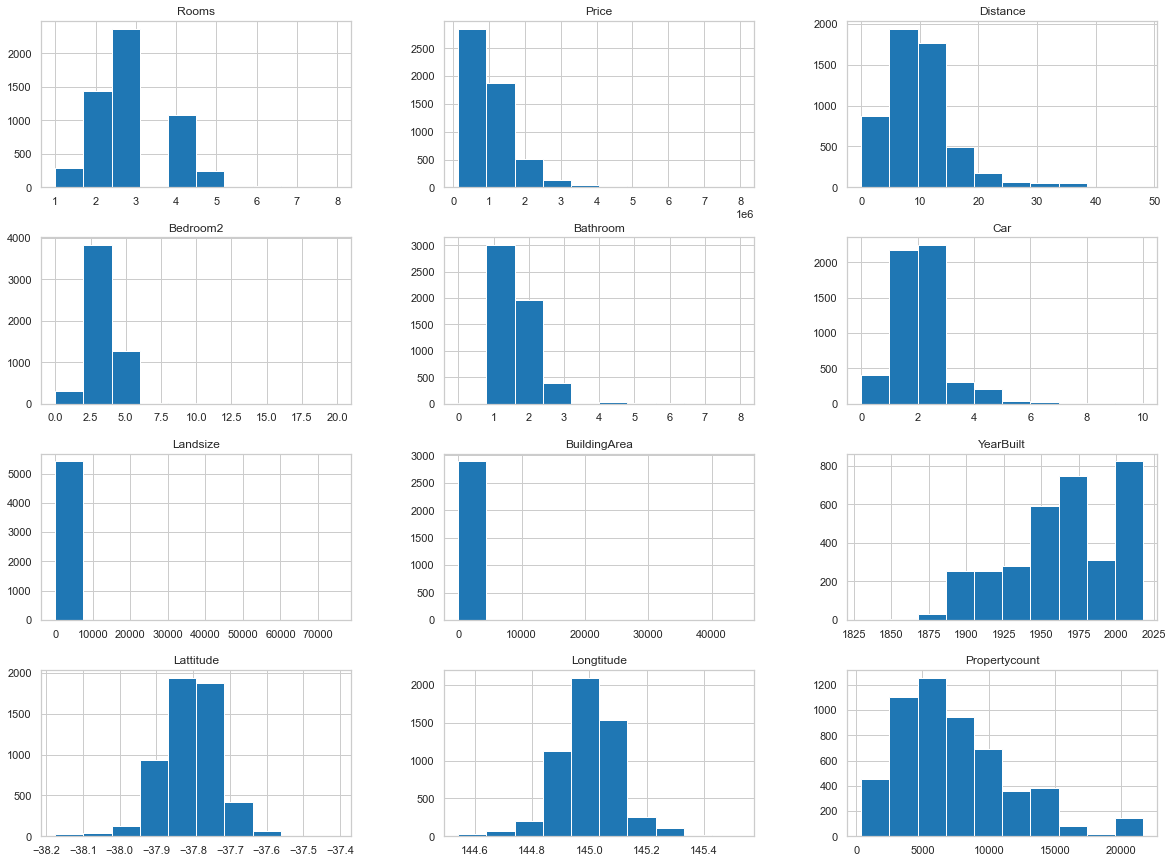

In [10]:
housing.hist(bins=10, figsize=(20,15))
plt.show()

## Divide into train - validation

There are several ways to divide your training data. Sometimes it is important to create a stratified sampling.

In [11]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set),len(test_set)

(4346, 1086)

In [13]:
## Create a function that divides the data with an id
## checks that id is not train and test set
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

## create an id base on latitude and longitude
housing_with_id["id"] = housing["Longtitude"] * 1000 + housing["Lattitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [15]:
test_set.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
5,5,Coburg,4/34 Gladstone St,2,u,650000.0,S,Barry,29/04/2017,7.8,3058.0,2.0,1.0,1.0,136.0,81.0,1975.0,Moreland,-37.74490,144.97540,Northern Metropolitan,11204.0,144937.65510
11,11,Malvern East,2/25 Fisher St,3,t,1135000.0,S,Jellis,17/09/2016,11.2,3145.0,3.0,3.0,2.0,0.0,130.0,1988.0,Stonnington,-37.88120,145.05700,Southern Metropolitan,8801.0,145019.11880
12,12,Coburg North,27 Williams Rd,4,h,770000.0,S,Brad,13/05/2017,9.2,3058.0,4.0,1.0,1.0,545.0,NaN,NaN,Moreland,-37.73040,144.96050,Northern Metropolitan,3445.0,144922.76960
16,16,Hawthorn East,1/27 Auburn Gr,3,h,1405000.0,S,Kay,20/05/2017,7.5,3123.0,3.0,2.0,2.0,185.0,185.0,1985.0,Boroondara,-37.82550,145.04810,Southern Metropolitan,6482.0,145010.27450
24,24,Oakleigh South,8 Cedar Ct,3,h,880000.0,S,Buxton,8/07/2017,15.5,3167.0,3.0,2.0,2.0,504.0,NaN,NaN,Kingston,-37.94043,145.09314,South-Eastern Metropolitan,3692.0,145055.19957


In [16]:
## divide using the scikit learn function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

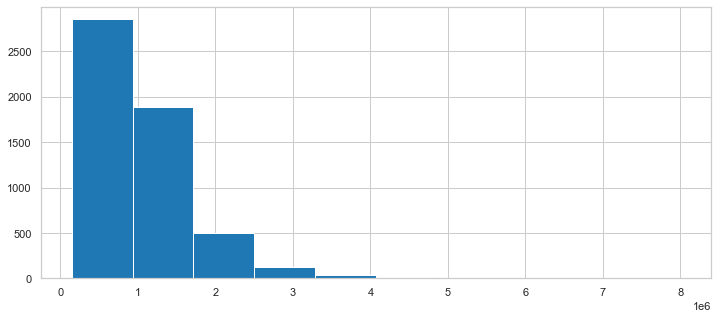

In [17]:
housing["Price"].hist()

In [18]:
housing["price_cat"] = pd.cut(housing["Price"],
                               bins=[0., 500000, 1000000, 1500000, 2000000., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [19]:
housing["price_cat"].value_counts()

2    2498
3    1286
1     646
4     597
5     405
Name: price_cat, dtype: int64

<AxesSubplot:>

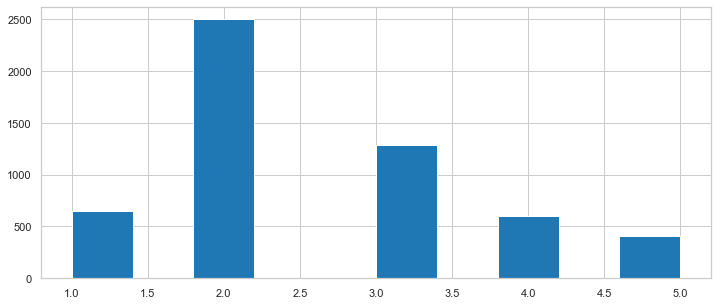

In [20]:
housing["price_cat"].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["price_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
strat_test_set["price_cat"].value_counts() / len(strat_test_set)


2    0.459982
3    0.236431
1    0.118675
4    0.110396
5    0.074517
Name: price_cat, dtype: float64

In [23]:
housing["price_cat"].value_counts() / len(housing)

2    0.459867
3    0.236745
1    0.118925
4    0.109904
5    0.074558
Name: price_cat, dtype: float64

In [24]:
def price_cat_proportions(data):
    return data["price_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": price_cat_proportions(housing),
    "Stratified": price_cat_proportions(strat_test_set),
    "Random": price_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [25]:
## check the proportion of each category with the different approaches
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.118925,0.118675,0.115915,-2.530611,-0.209911
2,0.459867,0.459982,0.471941,2.625467,0.024822
3,0.236745,0.236431,0.226311,-4.407382,-0.132915
4,0.109904,0.110396,0.114995,4.632331,0.447037
5,0.074558,0.074517,0.070837,-4.990744,-0.055198


In [26]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

## Discover and visualize the data to gain insights

In [27]:
housing = strat_train_set.copy()

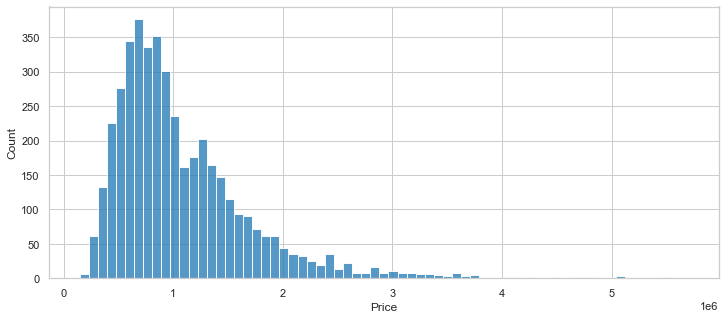

In [28]:
sns.histplot(train_set["Price"])
plt.show()

In [29]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

h    3014
u     944
t     387
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

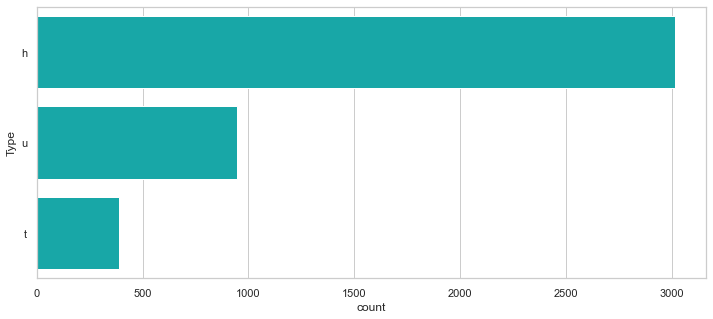

In [30]:
sns.countplot(y="Type", data=train_set, color="c")

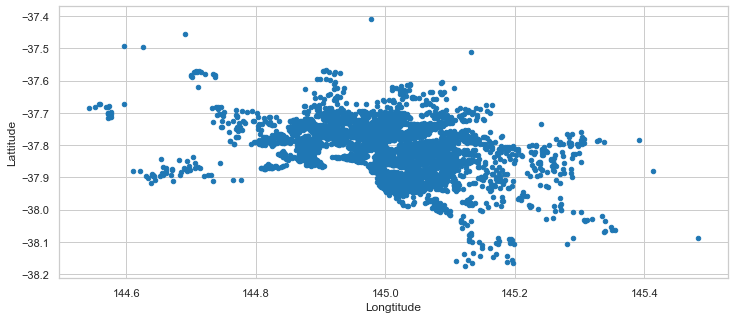

In [31]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude")
plt.show()

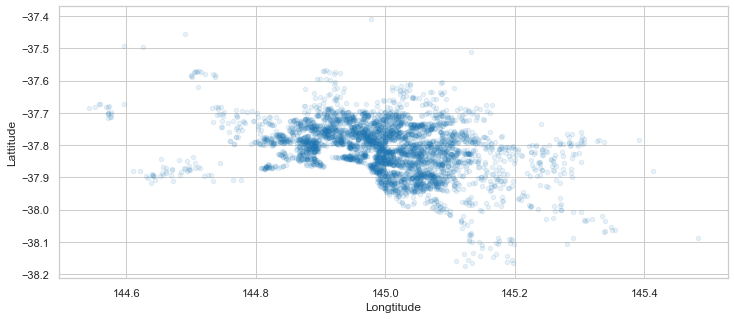

In [32]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


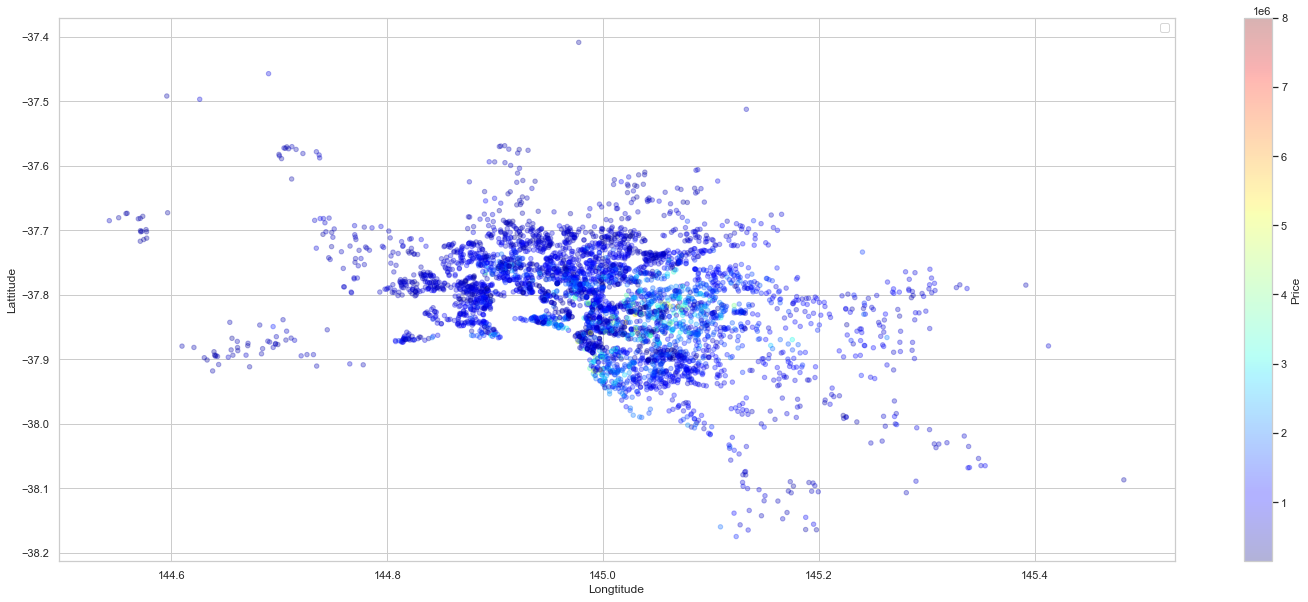

In [33]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

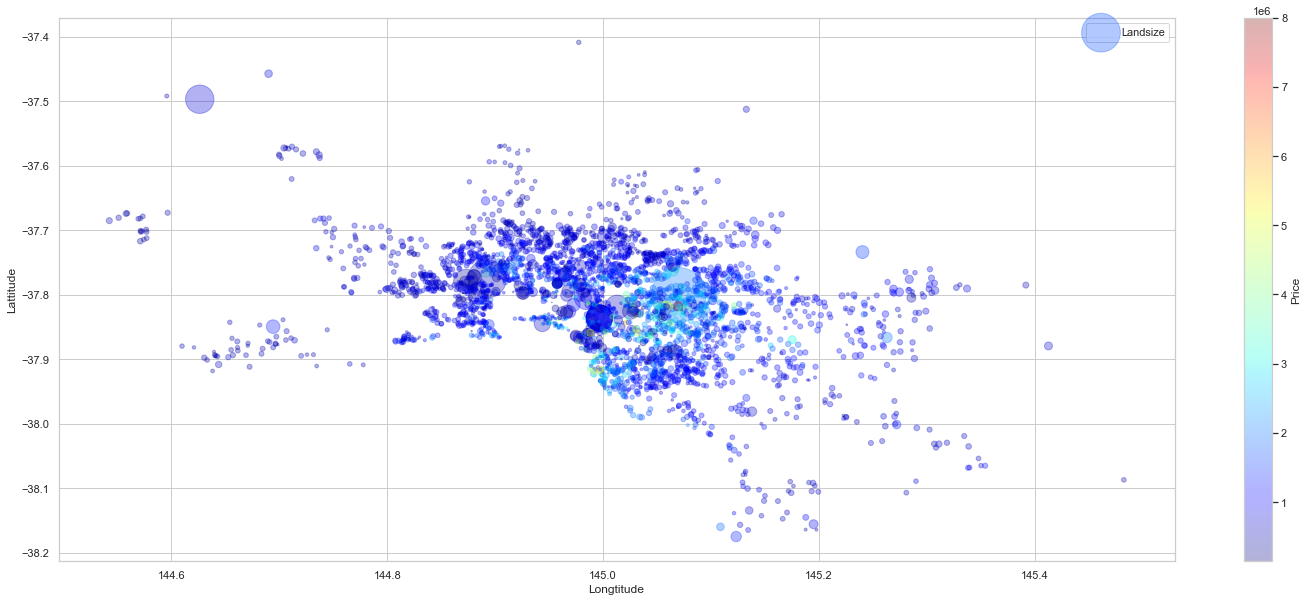

In [34]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             s=housing["Landsize"]/25, label="Landsize", 
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

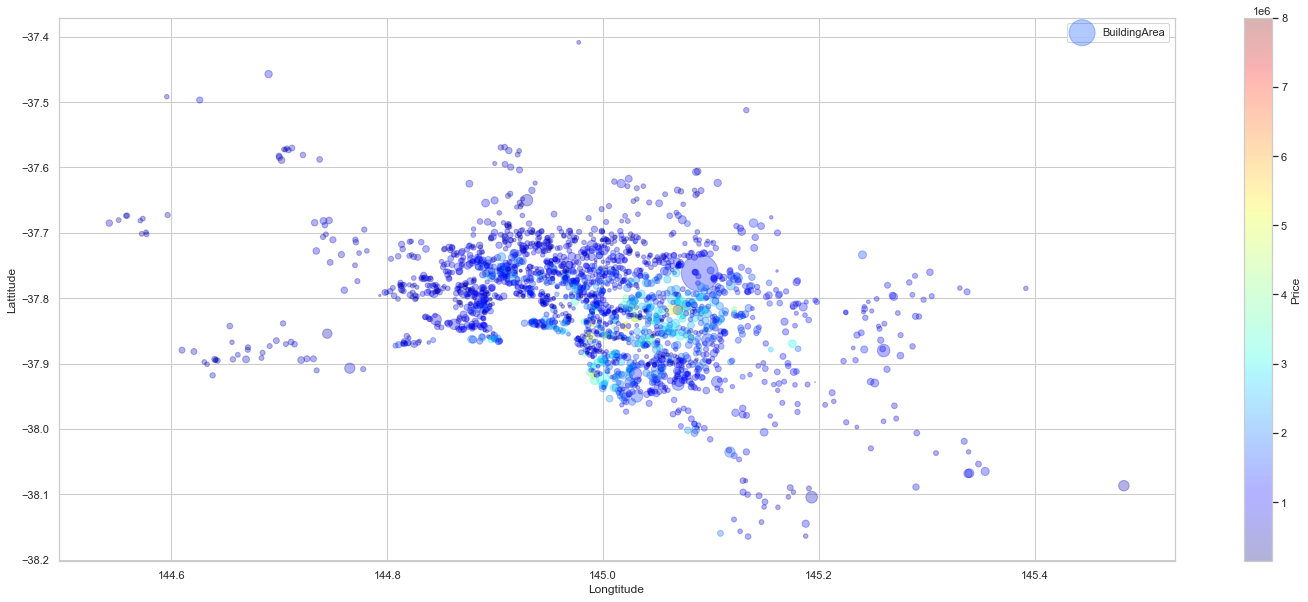

In [35]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             s=housing["BuildingArea"]/5, label="BuildingArea", 
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

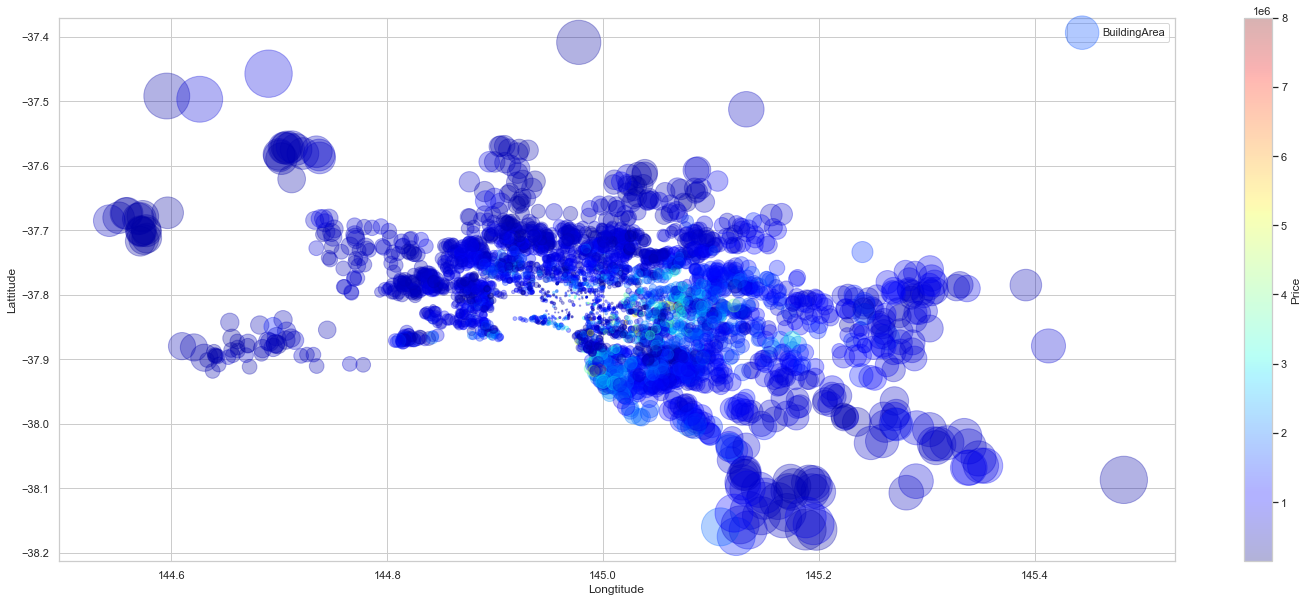

In [36]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.3,
             s=housing["Distance"]**2, label="BuildingArea", 
             figsize=(25,10),
             c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [37]:
corr_matrix = housing.corr()

In [38]:
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.487933
Bedroom2         0.450010
Bathroom         0.442478
BuildingArea     0.265870
Car              0.213664
Longtitude       0.189497
Landsize         0.051059
Propertycount   -0.032002
Distance        -0.173708
Lattitude       -0.198889
YearBuilt       -0.354215
Name: Price, dtype: float64

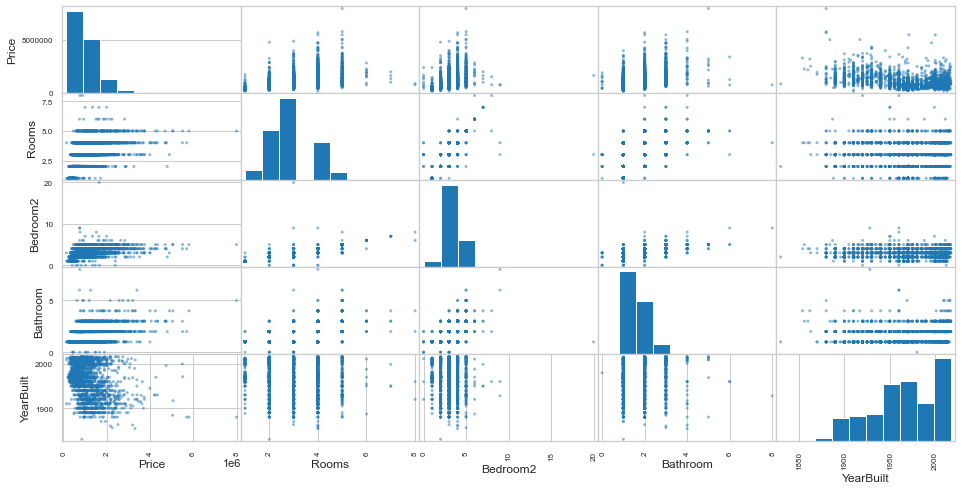

In [39]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "Bedroom2","Bathroom",
              "YearBuilt"]
scatter_matrix(housing[attributes], figsize=(16, 8))
plt.show()

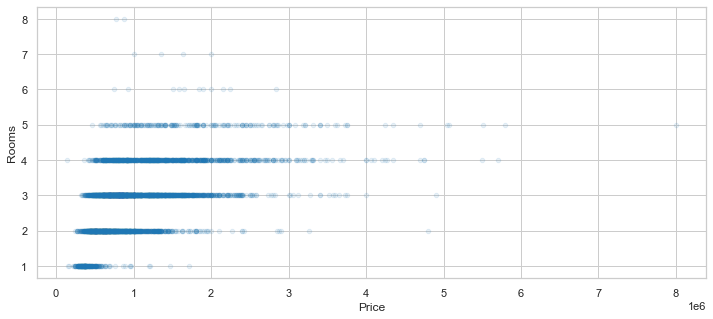

In [40]:
housing.plot(kind="scatter", x="Price", y="Rooms",
             alpha=0.1)
plt.show()

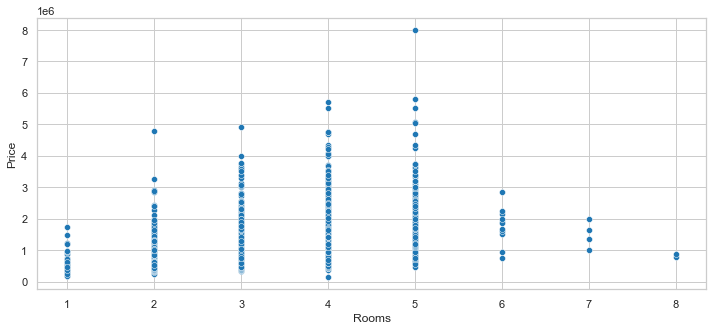

In [41]:
sns.scatterplot(data=housing, x="Rooms", y="Price")
plt.show()

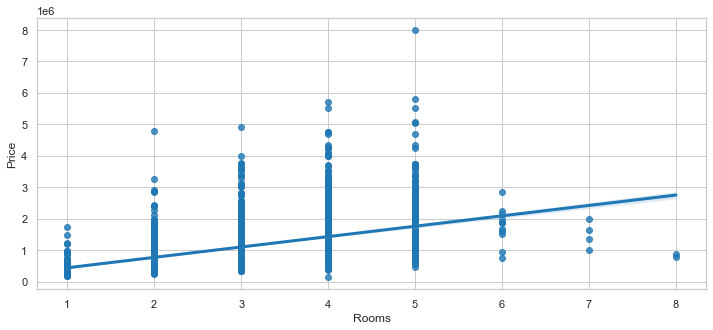

In [42]:
sns.regplot(data=housing, x="Rooms", y="Price")
plt.show()

In [43]:
## Plot landsize vs Price

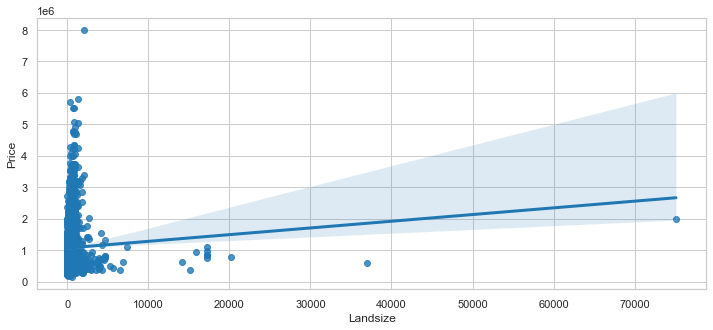

In [44]:
sns.regplot(data=housing, x="Landsize", y="Price")
plt.show()

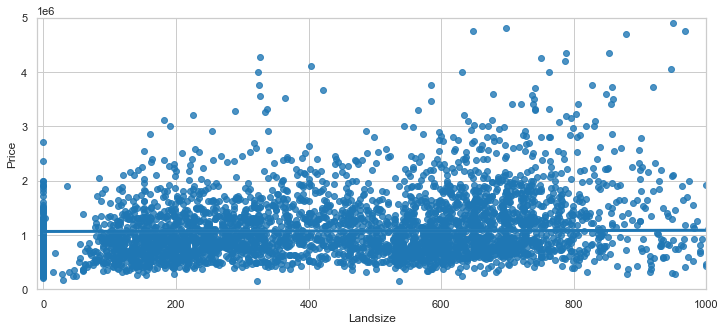

In [45]:
sns.regplot(data=housing, x="Landsize", y="Price")
plt.axis([-10, 1000, 0, 5e6])
plt.show()

In [46]:
## mmm there is a lot of 0 at Landsize.... 

In [47]:
## Let's see BuildingArea

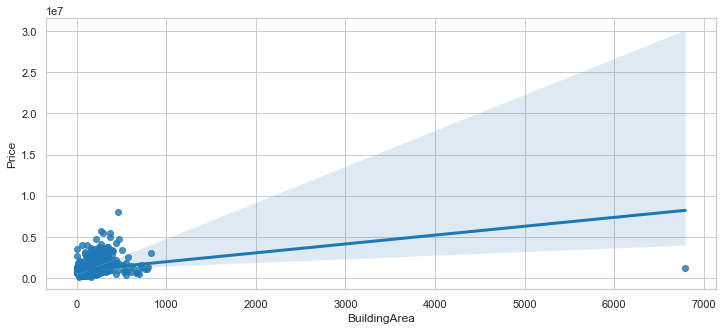

In [48]:
sns.regplot(data=housing, x="BuildingArea", y="Price")
plt.show()

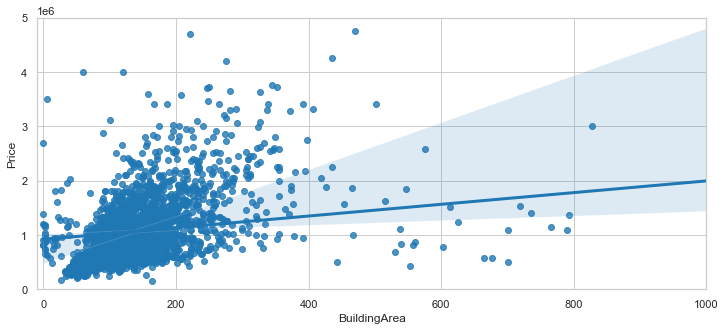

In [49]:
sns.regplot(data=housing, x="BuildingArea", y="Price",)
plt.axis([-10, 1000, 0, 5e6])
plt.show()

In [50]:
## Now there is no 0 but NaNs.. NaNs are not displayed, neither taked into account to estimate the fit

In [51]:
housing[['Price','Landsize','BuildingArea']].head(10)

,Price,Landsize,BuildingArea
index,,,
3637,1740000.0,739.0,155.0
3712,920000.0,230.0,NaN
4915,930000.0,635.0,NaN
2957,622000.0,137.0,71.0
2115,630000.0,0.0,NaN
3837,785000.0,0.0,NaN
4363,525500.0,88.0,60.0
1837,800000.0,0.0,89.0
2736,920000.0,0.0,NaN


In [52]:
housing.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,4345.000000,4.345000e+03,4345.000000,4345.000000,4345.000000,4326.000000,4345.000000,2314.000000,2643.000000,4345.000000,4345.000000,4345.000000
mean,2.933026,1.075276e+06,10.257077,2.915305,1.533257,1.625058,531.242808,146.213439,1965.088914,-37.810694,144.996836,7341.139931
std,0.950370,6.430367e+05,6.071930,0.997099,0.701459,0.983781,1542.095328,162.525403,36.307565,0.079887,0.106853,4344.860422
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,184.000000,92.000000,1940.000000,-37.857600,144.932800,4181.000000
50%,3.000000,9.010000e+05,9.200000,3.000000,1.000000,2.000000,443.000000,125.000000,1970.000000,-37.802740,145.000600,6482.000000
75%,3.000000,1.325000e+06,13.000000,3.000000,2.000000,2.000000,654.000000,173.000000,1999.000000,-37.758000,145.059500,10331.000000
max,8.000000,8.000000e+06,47.400000,20.000000,8.000000,10.000000,75100.000000,6791.000000,2017.000000,-37.408530,145.482730,21650.000000


## Prepare the data for Machine Learning algorithms

In [53]:
housing = strat_train_set.drop("Price", axis=1) # drop labels for training set
housing_labels = strat_train_set["Price"].copy()

### Data Cleaning 

What to do with data with missing values
* Option 1: Remove rows
* Option 2: Remove columns
* Option 3: Impute missing values

In [54]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
print(housing.shape[0],sample_incomplete_rows.shape[0])
sample_incomplete_rows.head()

4345 2340


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
3712,Moorabbin,3/13 Perry St,3,t,S,hockingstuart,29/07/2017,14.3,3189.0,3.0,2.0,2.0,230.0,NaN,NaN,Kingston,-37.93793,145.04048,Southern Metropolitan,2555.0
4915,Reservoir,44 Mendip Rd,4,h,S,Barry,20/05/2017,11.2,3073.0,4.0,1.0,3.0,635.0,NaN,NaN,Darebin,-37.72050,145.01650,Northern Metropolitan,21650.0
2115,Richmond,5/33 Goodwood St,2,u,SP,Biggin,8/07/2017,2.4,3121.0,2.0,1.0,1.0,0.0,NaN,1970.0,Yarra,-37.81977,144.99597,Northern Metropolitan,14949.0
3837,Newport,1/217 Woods St,3,h,S,Raine,4/03/2017,8.4,3015.0,3.0,2.0,2.0,0.0,NaN,2013.0,Hobsons Bay,-37.84470,144.86540,Western Metropolitan,5498.0
2736,Toorak,6/2 Tintern Av,2,u,S,hockingstuart,22/07/2017,4.1,3142.0,2.0,2.0,1.0,0.0,NaN,NaN,Stonnington,-37.84139,145.00678,Southern Metropolitan,7217.0


In [55]:
# # option 1 : remove those rows with nans 
cols_wiht_nans = housing.columns[housing.isna().any()].tolist()
housing.dropna()    

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
3637,Moonee Ponds,2 Parry St,5,h,S,Brad,27/06/2016,6.9,3039.0,4.0,1.0,2.0,739.0,155.0,1930.0,Moonee Valley,-37.76130,144.91770,Western Metropolitan,6232.0
2957,Wantirna South,12/440 Stud Rd,3,u,S,Ray,15/07/2017,14.7,3152.0,3.0,1.0,1.0,137.0,71.0,2012.0,Knox,-37.87615,145.23192,Eastern Metropolitan,7082.0
4363,Alphington,3/19 Harker St,2,u,S,Miles,12/11/2016,6.4,3078.0,2.0,1.0,1.0,88.0,60.0,1960.0,Darebin,-37.77910,145.03060,Northern Metropolitan,2211.0
1837,Richmond,201/65 Stawell St,2,u,VB,hockingstuart,15/07/2017,2.4,3121.0,2.0,2.0,2.0,0.0,89.0,2008.0,Yarra,-37.82201,145.01040,Northern Metropolitan,14949.0
1125,Reservoir,9/99 Barton St,2,u,SP,Love,13/08/2016,11.2,3073.0,2.0,1.0,1.0,0.0,54.0,2012.0,Darebin,-37.71120,144.99890,Northern Metropolitan,21650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,Brunswick,32 Lobb St,3,t,SP,Jellis,25/02/2017,5.2,3056.0,3.0,2.0,2.0,4668.0,126.0,2011.0,Moreland,-37.76870,144.96490,Northern Metropolitan,11918.0
2862,Oakleigh,197 Huntingdale Rd,3,h,S,Ray,25/02/2017,14.0,3166.0,3.0,1.0,2.0,543.0,139.0,1940.0,Monash,-37.90230,145.10500,Southern Metropolitan,3224.0
3391,Maribyrnong,104 Gatehouse Pl,2,u,SP,Biggin,7/05/2016,8.7,3032.0,2.0,1.0,2.0,5661.0,103.0,1940.0,Maribyrnong,-37.77300,144.88060,Western Metropolitan,4918.0


In [56]:
# only from a subset of columns
cols_wiht_nans = housing.columns[housing.isna().any()].tolist()
housing.dropna(subset=["BuildingArea"])    

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
3637,Moonee Ponds,2 Parry St,5,h,S,Brad,27/06/2016,6.9,3039.0,4.0,1.0,2.0,739.0,155.0,1930.0,Moonee Valley,-37.76130,144.91770,Western Metropolitan,6232.0
2957,Wantirna South,12/440 Stud Rd,3,u,S,Ray,15/07/2017,14.7,3152.0,3.0,1.0,1.0,137.0,71.0,2012.0,Knox,-37.87615,145.23192,Eastern Metropolitan,7082.0
4363,Alphington,3/19 Harker St,2,u,S,Miles,12/11/2016,6.4,3078.0,2.0,1.0,1.0,88.0,60.0,1960.0,Darebin,-37.77910,145.03060,Northern Metropolitan,2211.0
1837,Richmond,201/65 Stawell St,2,u,VB,hockingstuart,15/07/2017,2.4,3121.0,2.0,2.0,2.0,0.0,89.0,2008.0,Yarra,-37.82201,145.01040,Northern Metropolitan,14949.0
1125,Reservoir,9/99 Barton St,2,u,SP,Love,13/08/2016,11.2,3073.0,2.0,1.0,1.0,0.0,54.0,2012.0,Darebin,-37.71120,144.99890,Northern Metropolitan,21650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,Brunswick,32 Lobb St,3,t,SP,Jellis,25/02/2017,5.2,3056.0,3.0,2.0,2.0,4668.0,126.0,2011.0,Moreland,-37.76870,144.96490,Northern Metropolitan,11918.0
2862,Oakleigh,197 Huntingdale Rd,3,h,S,Ray,25/02/2017,14.0,3166.0,3.0,1.0,2.0,543.0,139.0,1940.0,Monash,-37.90230,145.10500,Southern Metropolitan,3224.0
3391,Maribyrnong,104 Gatehouse Pl,2,u,SP,Biggin,7/05/2016,8.7,3032.0,2.0,1.0,2.0,5661.0,103.0,1940.0,Maribyrnong,-37.77300,144.88060,Western Metropolitan,4918.0


In [57]:
## option 2 : remove those columns
cols_wiht_nans = housing.columns[housing.isna().any()].tolist()
housing.drop(cols_wiht_nans, axis=1)       # option 2


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,
3637,Moonee Ponds,2 Parry St,5,h,S,Brad,27/06/2016,6.9,3039.0,4.0,1.0,739.0,-37.76130,144.91770,Western Metropolitan,6232.0
3712,Moorabbin,3/13 Perry St,3,t,S,hockingstuart,29/07/2017,14.3,3189.0,3.0,2.0,230.0,-37.93793,145.04048,Southern Metropolitan,2555.0
4915,Reservoir,44 Mendip Rd,4,h,S,Barry,20/05/2017,11.2,3073.0,4.0,1.0,635.0,-37.72050,145.01650,Northern Metropolitan,21650.0
2957,Wantirna South,12/440 Stud Rd,3,u,S,Ray,15/07/2017,14.7,3152.0,3.0,1.0,137.0,-37.87615,145.23192,Eastern Metropolitan,7082.0
2115,Richmond,5/33 Goodwood St,2,u,SP,Biggin,8/07/2017,2.4,3121.0,2.0,1.0,0.0,-37.81977,144.99597,Northern Metropolitan,14949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,Maribyrnong,104 Gatehouse Pl,2,u,SP,Biggin,7/05/2016,8.7,3032.0,2.0,1.0,5661.0,-37.77300,144.88060,Western Metropolitan,4918.0
335,Heathmont,1/34 Campbell St,2,u,S,Fletchers,15/07/2017,21.3,3135.0,2.0,1.0,0.0,-37.82118,145.24138,Eastern Metropolitan,3794.0
5338,Bayswater,85 Begonia Av,3,h,S,iTRAK,23/09/2017,23.2,3153.0,3.0,2.0,782.0,-37.85002,145.25964,Eastern Metropolitan,5030.0


In [58]:
## option 3 : Set values to some values
median = housing["BuildingArea"].median()
housing["BuildingArea"].fillna(median, inplace=True) 
housing.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
3637,Moonee Ponds,2 Parry St,5,h,S,Brad,27/06/2016,6.9,3039.0,4.0,1.0,2.0,739.0,155.0,1930.0,Moonee Valley,-37.76130,144.91770,Western Metropolitan,6232.0
3712,Moorabbin,3/13 Perry St,3,t,S,hockingstuart,29/07/2017,14.3,3189.0,3.0,2.0,2.0,230.0,125.0,NaN,Kingston,-37.93793,145.04048,Southern Metropolitan,2555.0
4915,Reservoir,44 Mendip Rd,4,h,S,Barry,20/05/2017,11.2,3073.0,4.0,1.0,3.0,635.0,125.0,NaN,Darebin,-37.72050,145.01650,Northern Metropolitan,21650.0
2957,Wantirna South,12/440 Stud Rd,3,u,S,Ray,15/07/2017,14.7,3152.0,3.0,1.0,1.0,137.0,71.0,2012.0,Knox,-37.87615,145.23192,Eastern Metropolitan,7082.0
2115,Richmond,5/33 Goodwood St,2,u,SP,Biggin,8/07/2017,2.4,3121.0,2.0,1.0,1.0,0.0,125.0,1970.0,Yarra,-37.81977,144.99597,Northern Metropolitan,14949.0


In [59]:
median = housing["YearBuilt"].median()
housing["YearBuilt"].fillna(median, inplace=True) 
housing.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
3637,Moonee Ponds,2 Parry St,5,h,S,Brad,27/06/2016,6.9,3039.0,4.0,1.0,2.0,739.0,155.0,1930.0,Moonee Valley,-37.76130,144.91770,Western Metropolitan,6232.0
3712,Moorabbin,3/13 Perry St,3,t,S,hockingstuart,29/07/2017,14.3,3189.0,3.0,2.0,2.0,230.0,125.0,1970.0,Kingston,-37.93793,145.04048,Southern Metropolitan,2555.0
4915,Reservoir,44 Mendip Rd,4,h,S,Barry,20/05/2017,11.2,3073.0,4.0,1.0,3.0,635.0,125.0,1970.0,Darebin,-37.72050,145.01650,Northern Metropolitan,21650.0
2957,Wantirna South,12/440 Stud Rd,3,u,S,Ray,15/07/2017,14.7,3152.0,3.0,1.0,1.0,137.0,71.0,2012.0,Knox,-37.87615,145.23192,Eastern Metropolitan,7082.0
2115,Richmond,5/33 Goodwood St,2,u,SP,Biggin,8/07/2017,2.4,3121.0,2.0,1.0,1.0,0.0,125.0,1970.0,Yarra,-37.81977,144.99597,Northern Metropolitan,14949.0


In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [61]:
housing_num = housing.select_dtypes(include=[np.number])

In [62]:
imputer.fit(housing_num)
imputer.statistics_

array([ 3.000000e+00,  9.200000e+00,  3.000000e+00,  1.000000e+00,
        2.000000e+00,  4.430000e+02,  1.250000e+02,  1.970000e+03,
       -3.780274e+01,  1.450006e+02,  6.482000e+03])

Check that this is the same as manually computing the median of each attribute:

In [63]:
housing_num.median().values

array([ 3.000000e+00,  9.200000e+00,  3.000000e+00,  1.000000e+00,
        2.000000e+00,  4.430000e+02,  1.250000e+02,  1.970000e+03,
       -3.780274e+01,  1.450006e+02,  6.482000e+03])

Transform the training set:



In [64]:
X = imputer.transform(housing_num)

In [65]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [66]:
housing_tr.loc[sample_incomplete_rows.index.values]


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
index,,,,,,,,,,,
3712,3.0,14.3,3.0,2.0,2.0,230.0,125.0,1970.0,-37.93793,145.04048,2555.0
4915,4.0,11.2,4.0,1.0,3.0,635.0,125.0,1970.0,-37.72050,145.01650,21650.0
2115,2.0,2.4,2.0,1.0,1.0,0.0,125.0,1970.0,-37.81977,144.99597,14949.0
3837,3.0,8.4,3.0,2.0,2.0,0.0,125.0,2013.0,-37.84470,144.86540,5498.0
2736,2.0,4.1,2.0,2.0,1.0,0.0,125.0,1970.0,-37.84139,145.00678,7217.0
...,...,...,...,...,...,...,...,...,...,...,...
1217,5.0,23.0,5.0,3.0,3.0,857.0,285.0,2012.0,-37.79773,145.26956,11925.0
5181,3.0,4.0,3.0,2.0,1.0,138.0,122.0,1998.0,-37.76292,144.97975,5533.0
391,3.0,8.7,3.0,1.0,2.0,696.0,125.0,1970.0,-37.78320,144.88640,4918.0


In [67]:
imputer.strategy

'median'

In [68]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [69]:
housing_tr.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
index,,,,,,,,,,,
3637,5.0,6.9,4.0,1.0,2.0,739.0,155.0,1930.0,-37.76130,144.91770,6232.0
3712,3.0,14.3,3.0,2.0,2.0,230.0,125.0,1970.0,-37.93793,145.04048,2555.0
4915,4.0,11.2,4.0,1.0,3.0,635.0,125.0,1970.0,-37.72050,145.01650,21650.0
2957,3.0,14.7,3.0,1.0,1.0,137.0,71.0,2012.0,-37.87615,145.23192,7082.0
2115,2.0,2.4,2.0,1.0,1.0,0.0,125.0,1970.0,-37.81977,144.99597,14949.0


### Categorical data

Now let's preprocess the categorical input feature, CouncilArea:

In [70]:
housing_cat = housing[["CouncilArea"]]
# There is missing values in this category, we will create a new cateogry for those.
housing_cat.fillna('Unknown').head(10)

,CouncilArea
index,
3637,Moonee Valley
3712,Kingston
4915,Darebin
2957,Knox
2115,Yarra
3837,Hobsons Bay
4363,Darebin
1837,Yarra
2736,Stonnington


In [71]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.fillna('Unknown'))
housing_cat_encoded[:10]

array([[21.],
       [12.],
       [ 6.],
       [13.],
       [31.],
       [10.],
       [ 6.],
       [31.],
       [25.],
       [ 6.]])

In [72]:
ordinal_encoder.categories_

[array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
        'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
        'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
        'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
        'Monash', 'Moonee Valley', 'Moreland', 'Nillumbik', 'Port Phillip',
        'Stonnington', 'Unavailable', 'Unknown', 'Whitehorse',
        'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'], dtype=object)]

In [73]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown='ignore')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat.fillna('Unknown'))
housing_cat_1hot

<4345x33 sparse matrix of type '<class 'numpy.float64'>'
	with 4345 stored elements in Compressed Sparse Row format>

In [74]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Alternatively, you can set sparse=False when creating the OneHotEncoder:

In [75]:
cat_encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat.fillna('Unknown'))
housing_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
cat_encoder.categories_

[array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
        'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
        'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
        'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
        'Monash', 'Moonee Valley', 'Moreland', 'Nillumbik', 'Port Phillip',
        'Stonnington', 'Unavailable', 'Unknown', 'Whitehorse',
        'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'], dtype=object)]

Let's create a custom transformer to add extra attributes:


In [77]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
Rooms_ix, Bedroom2_ix, Bathroom_ix, BuildingArea_ix = 0, 2, 3, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_building_area = X[:, Rooms_ix] / (1.0 +X[:, BuildingArea_ix])# add 1 to avoid 0 division
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, Bedroom2_ix] / (1.0 + X[:, Bathroom_ix]) # add 1 to avoid 0 division
            return np.c_[X, rooms_per_building_area, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_building_area]
        

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing_num.values)

In [78]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing_num.columns)+["rooms_per_building_area", "bedrooms_per_room"],
    index=housing.index)
housing_extra_attribs.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,rooms_per_building_area,bedrooms_per_room
index,,,,,,,,,,,,,
3637,5.0,6.9,4.0,1.0,2.0,739.0,155.0,1930.0,-37.76130,144.91770,6232.0,0.032051,2.0
3712,3.0,14.3,3.0,2.0,2.0,230.0,125.0,1970.0,-37.93793,145.04048,2555.0,0.023810,1.0
4915,4.0,11.2,4.0,1.0,3.0,635.0,125.0,1970.0,-37.72050,145.01650,21650.0,0.031746,2.0
2957,3.0,14.7,3.0,1.0,1.0,137.0,71.0,2012.0,-37.87615,145.23192,7082.0,0.041667,1.5
2115,2.0,2.4,2.0,1.0,1.0,0.0,125.0,1970.0,-37.81977,144.99597,14949.0,0.015873,1.0


Now let's build a pipeline for preprocessing the numerical attributes:

C:\Users\SIMON\AppData\Local\Temp/ipykernel_17424/4080851371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == 0] = np.nan
C:\Users\SIMON\Anaconda3\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


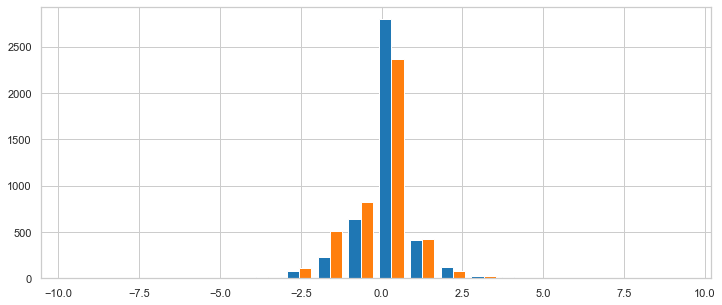

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer


## create a function to replace 0 by NaN
def replace_0_2_NaN(data):
    data[data == 0] = np.nan
    return data


num0_pipeline = Pipeline([
        ('zeros2NaN',FunctionTransformer(func = replace_0_2_NaN,validate=False)),
        ('imputer', SimpleImputer(strategy="median")),
        ('log',FunctionTransformer(np.log1p, validate=True)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num0_pipeline.fit_transform(housing[['BuildingArea','Landsize']])
plt.hist(housing_num_tr,bins=20)
plt.show()

In [80]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [81]:
housing_num_tr

array([[ 2.1751659 , -0.55294835,  1.08797617, ..., -0.25530569,
         0.01141637,  2.24697395],
       [ 0.07047915,  0.66591486,  0.08495125, ..., -1.10169035,
        -0.05001502, -0.46743492],
       [ 1.12282252,  0.15531   ,  1.08797617, ...,  3.29366321,
         0.00914114,  2.24697395],
       ...,
       [ 0.07047915,  2.13184494,  0.08495125, ..., -0.53198623,
        -0.05001502, -0.46743492],
       [-2.03420759, -1.06355321, -1.9210986 , ...,  0.3008176 ,
        -0.16832733, -1.82463936],
       [ 1.12282252, -0.07528574,  1.08797617, ..., -1.55446125,
        -0.13874925,  0.43736804]])

In [82]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='Unknown')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])

In [83]:
from sklearn.compose import ColumnTransformer

num_attribs0 = ['Landsize','BuildingArea']
num_attribs1 = list(housing_num)
cat_attribs = ["CouncilArea",'Type','Suburb','Postcode']


full_pipeline = ColumnTransformer([
        ("num0", num0_pipeline, num_attribs0),
        ("num1", num_pipeline, num_attribs1),
        ("cat", cat_pipeline, cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared

<4345x517 sparse matrix of type '<class 'numpy.float64'>'
	with 82555 stored elements in Compressed Sparse Row format>

## Select and train a model

### Linear Regression

In [84]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [85]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:25]
some_labels = housing_labels.iloc[:25]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [1677142.36556926  850775.1611031  1143771.46615521  185940.05764419
  649976.11966595 1001344.76845424  518150.00064259  762476.05469352
 1419327.01485524  -33811.8473675   945501.48233187 1452068.08841555
  729306.53828232 -321518.62334129  429677.42073092  792187.18176469
 1102651.62753704 1093478.58990812  786667.657549     40044.55158418
 1512440.42897957  682997.47872696 1586969.19551273 1139687.77613271
  604249.03835954]


Compare against the actual values:

In [86]:
print("Labels:", list(some_labels))


Labels: [1740000.0, 920000.0, 930000.0, 622000.0, 630000.0, 785000.0, 525500.0, 800000.0, 920000.0, 335000.0, 680000.0, 1660000.0, 595999.0, 315000.0, 597500.0, 601000.0, 1080000.0, 1250000.0, 650000.0, 282000.0, 1651000.0, 740000.0, 1490000.0, 1035000.0, 705000.0]


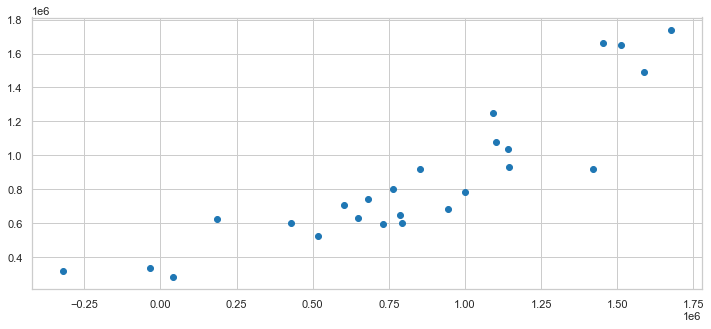

In [87]:
plt.scatter(lin_reg.predict(some_data_prepared),list(some_labels))

In [88]:
some_data_prepared

<25x517 sparse matrix of type '<class 'numpy.float64'>'
	with 475 stored elements in Compressed Sparse Row format>

In [89]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

349528.7191396004

In [90]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

224961.62003182952

### K-Nearest Neighbour

In [91]:
from sklearn import neighbors

n_neighbors = 3
knn_reg = neighbors.KNeighborsRegressor(n_neighbors)
knn_reg.fit(housing_prepared, housing_labels)

KNeighborsRegressor(n_neighbors=3)

In [92]:
housing_predictions = knn_reg.predict(housing_prepared)
knn_mse = mean_squared_error(housing_labels, housing_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse


252105.49248977262

### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [94]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4084.466995428806

## Fine-tune your model

Find the best parameters for your model. In order to do so, we will use the 10-fold cross-validation

In [95]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_root_mean_squared_error", cv=10)


In [96]:
def display_scores(scores,model_name = None):
    if(model_name):
        print("----",model_name,"----")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(-scores,'Decision Tree')

---- Decision Tree ----
Mean: 419124.90232771856
Standard deviation: 35328.81480926059


In [97]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
display_scores(-lin_scores,'Linear Regression')

---- Linear Regression ----
Mean: 374370.7792441389
Standard deviation: 49778.2367147089


In [98]:
knn_scores = cross_val_score(knn_reg, housing_prepared, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
display_scores(-knn_scores,'Knn Regression')

---- Knn Regression ----
Mean: 369243.27783302835
Standard deviation: 45908.9732695163


In [99]:
## Let's try another model: SVM
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")

svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
display_scores(-svm_scores, 'SVM')

---- SVM ----
Mean: 660160.5403351302
Standard deviation: 54099.02711165886


In [100]:
## Let's try another model: Random Forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=20, random_state=42)

In [101]:
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

123658.5088592805

In [102]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
display_scores(-forest_scores, 'Random Forest')

---- Random Forest ----
Mean: 308537.58703090734
Standard deviation: 45938.83246838467


In [103]:
results = pd.Series(-forest_scores)

In [104]:
results.describe()

count        10.000000
mean     308537.587031
std       48423.781216
min      222717.020067
25%      278608.546312
50%      312669.261214
75%      324858.904296
max      384706.409639
dtype: float64

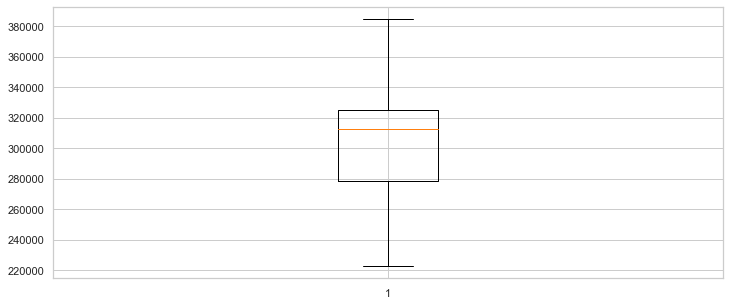

In [105]:
plt.boxplot(results)
plt.show()

In [106]:
## lets comare all of them 
models = [(lin_reg,"lin_reg"),
          (tree_reg,"Decision Tree"),
          (knn_reg,"KNN-Regressor"),
          (forest_reg,'Random Forest'),
          (svm_reg,'SVM Regressor')]
for model in models:
    scores = cross_val_score(model[0], housing_prepared, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
    display_scores(-scores, model[1])

---- lin_reg ----
Mean: 374370.7792441389
Standard deviation: 49778.2367147089
---- Decision Tree ----
Mean: 419124.90232771856
Standard deviation: 35328.81480926059
---- KNN-Regressor ----
Mean: 369243.27783302835
Standard deviation: 45908.9732695163
---- Random Forest ----
Mean: 308537.58703090734
Standard deviation: 45938.83246838467
---- SVM Regressor ----
Mean: 660160.5403351302
Standard deviation: 54099.02711165886


In [107]:
## Random forest looks to be the best model, but this model has several parametrs. Lets find the best parameters

In [108]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8], 'max_depth':[3,5,7,10]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [109]:
print("the best parameters are:")
print(grid_search.best_params_)

the best parameters are:
{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [110]:
print("Best Score")
np.sqrt(-grid_search.best_score_)

Best Score


578.4963676502243

In [111]:
print("the best trained model:")
grid_search.best_estimator_

the best trained model:


RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [112]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

620185.6371683435 {'max_depth': 3, 'max_features': 2, 'n_estimators': 3}
630798.0699328638 {'max_depth': 3, 'max_features': 2, 'n_estimators': 10}
627451.6818258499 {'max_depth': 3, 'max_features': 2, 'n_estimators': 30}
624331.4192554378 {'max_depth': 3, 'max_features': 4, 'n_estimators': 3}
632502.7165589372 {'max_depth': 3, 'max_features': 4, 'n_estimators': 10}
620679.3276074847 {'max_depth': 3, 'max_features': 4, 'n_estimators': 30}
623394.0325059813 {'max_depth': 3, 'max_features': 6, 'n_estimators': 3}
618736.1694806003 {'max_depth': 3, 'max_features': 6, 'n_estimators': 10}
602960.3126892284 {'max_depth': 3, 'max_features': 6, 'n_estimators': 30}
599010.2109869665 {'max_depth': 3, 'max_features': 8, 'n_estimators': 3}
597960.5245840342 {'max_depth': 3, 'max_features': 8, 'n_estimators': 10}
598167.0233771522 {'max_depth': 3, 'max_features': 8, 'n_estimators': 30}
607411.362426174 {'max_depth': 5, 'max_features': 2, 'n_estimators': 3}
625072.7106415879 {'max_depth': 5, 'max_feat

In [113]:
pd.DataFrame(grid_search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004202,0.000985,0.000200,0.000400,3,2,3,NaN,"{'max_depth': 3, 'max_features': 2, 'n_estimat...",-561286.737941,-644919.139798,-578807.908681,-669033.684761,-646880.714660,-620185.637168,42170.373044,47,-632827.366840,-613256.716284,-625224.101362,-609441.956326,-613449.604706,-618839.949103,8774.460949
1,0.008800,0.000400,0.001600,0.000490,3,2,10,NaN,"{'max_depth': 3, 'max_features': 2, 'n_estimat...",-575807.045661,-653145.391284,-589415.876572,-680731.750745,-654890.285402,-630798.069933,40766.919862,53,-644297.355084,-625202.228829,-640051.369978,-619441.921172,-625318.226320,-630862.220277,9572.229869
2,0.024200,0.000400,0.002401,0.000490,3,2,30,NaN,"{'max_depth': 3, 'max_features': 2, 'n_estimat...",-572997.542894,-651434.482768,-587345.613766,-677176.571270,-648304.198431,-627451.681826,40140.544994,52,-640588.744899,-621440.473551,-636026.165615,-615081.043661,-622133.523681,-627053.990281,9620.431645
3,0.003808,0.000404,0.000600,0.000490,3,4,3,NaN,"{'max_depth': 3, 'max_features': 4, 'n_estimat...",-569545.993649,-647555.680112,-585603.103926,-673252.627529,-645699.691062,-624331.419255,39725.506210,50,-635962.200693,-617800.603074,-633725.037561,-611634.335376,-619235.024316,-623671.440204,9499.242290
4,0.008798,0.000403,0.001195,0.000403,3,4,10,NaN,"{'max_depth': 3, 'max_features': 4, 'n_estimat...",-577744.090305,-655828.477789,-592458.365906,-682477.717220,-654004.931574,-632502.716559,40264.113667,54,-644997.236011,-627400.897437,-642304.552375,-620559.980642,-627811.696097,-632614.872512,9410.518364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.211405,0.004279,0.003189,0.000391,NaN,2,10,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-303790.218370,-384150.445901,-310438.840707,-385091.612837,-343268.414119,-345347.906387,34742.503834,3,-3966.425596,-4506.691792,-1545.382358,-2487.023885,-4471.314012,-3395.367529,1180.368000
50,0.064793,0.000762,0.001208,0.000395,NaN,3,3,False,"{'bootstrap': False, 'max_features': 3, 'n_est...",-362920.918237,-424720.924587,-364143.988428,-417128.226121,-407565.844358,-395295.980346,26501.377734,6,-3975.051380,-4538.022269,-2383.295419,-2351.007947,-5028.845420,-3655.244487,1103.380258
51,0.212398,0.002726,0.003594,0.000496,NaN,3,10,False,"{'bootstrap': False, 'max_features': 3, 'n_est...",-299745.353616,-387031.823157,-296765.715354,-380824.172673,-353050.639670,-343483.540894,38672.701737,2,-4071.553844,-4555.758368,-1590.744433,-2436.614858,-4525.895569,-3436.113414,1204.109509
52,0.064611,0.001018,0.000989,0.000009,NaN,4,3,False,"{'bootstrap': False, 'max_features': 4, 'n_est...",-322985.139255,-407892.103242,-374950.199964,-420043.648287,-394669.806258,-384108.179401,34024.918937,5,-3954.694565,-4538.022269,-1466.130384,-2283.413933,-4471.314012,-3342.715033,1242.634521


In [114]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42,n_estimators=5,max_depth=10),
                  param_grid={'max_features': range(2, 50, 2)},
                  scoring='neg_root_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
results = grid_search.cv_results_

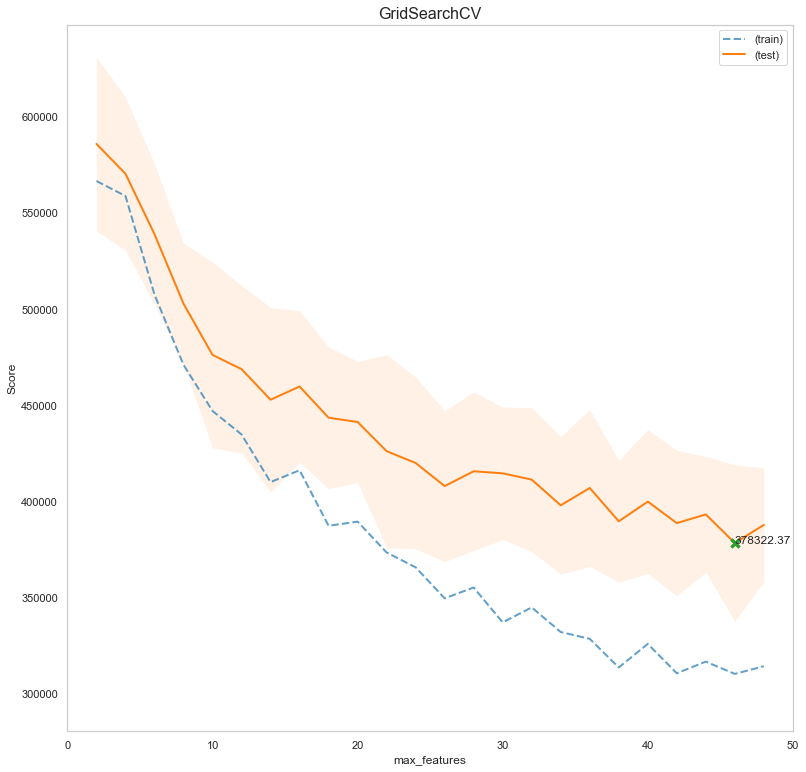

In [115]:
#plot the results
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV",
          fontsize=16)

plt.xlabel("max_features")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 50)


# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_features'].data, dtype=float)


for sample, style in (('train', '--'), ('test', '-')):
    sample_score_mean = (-results['mean_%s_score' % (sample)])
    sample_score_std = (results['std_%s_score' % (sample)])
    ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                    sample_score_mean + sample_score_std,
                    alpha=0.1 if sample == 'test' else 0)
    ax.plot(X_axis, sample_score_mean, style,
            alpha=1 if sample == 'test' else 0.7,
            label="(%s)" % ( sample))

best_index = np.nonzero(results['rank_test_score' ] == 1)[0][0]
best_score =  (-results['mean_test_score' ][best_index])

# Plot a dotted vertical line at the best score for that scorer marked by x
ax.plot([X_axis[best_index], ] * 2, [best_score, best_score],
        linestyle='-.',  marker='x', markeredgewidth=3, ms=8)

# Annotate the best score for that scorer
ax.annotate("%0.2f" % best_score,
            (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [116]:
## Best features according to Random Forest
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([3.77078275e-02, 4.00890902e-02, 3.01160833e-02, 5.97910678e-02,
       5.31001286e-02, 6.46358311e-02, 1.20447901e-02, 7.25632378e-02,
       9.97784060e-02, 7.12500251e-02, 7.47226472e-02, 6.75897292e-02,
       1.05473426e-02, 3.31768132e-02, 1.16997000e-02, 5.90206192e-04,
       8.74453053e-03, 5.16700719e-02, 6.60919889e-05, 0.00000000e+00,
       8.87424881e-09, 8.84320593e-05, 6.10029254e-04, 8.30406840e-04,
       0.00000000e+00, 1.09735181e-03, 1.51777830e-04, 0.00000000e+00,
       1.97906602e-06, 0.00000000e+00, 0.00000000e+00, 3.37090624e-04,
       0.00000000e+00, 1.75073787e-08, 1.94376941e-04, 0.00000000e+00,
       2.58146543e-04, 5.17659858e-05, 0.00000000e+00, 2.08559430e-03,
       3.15675961e-03, 0.00000000e+00, 8.55386047e-04, 8.17896387e-05,
       0.00000000e+00, 1.59050511e-03, 1.68548129e-04, 0.00000000e+00,
       2.01206511e-02, 1.29973432e-03, 6.62408746e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.80805326e-04,
      

In [117]:
extra_attribs = ["rooms_per_building_area", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(full_pipeline.named_transformers_["cat"]['one_hot_encoder'].categories_[0])
attributes = ["log_" + t for t in num_attribs0 ] + num_attribs1 + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.09977840601554254, 'BuildingArea'),
 (0.0747226471646598, 'Lattitude'),
 (0.07256323780656779, 'Landsize'),
 (0.0712500250940354, 'YearBuilt'),
 (0.06758972922049247, 'Longtitude'),
 (0.06463583107182087, 'Bathroom'),
 (0.05979106782638299, 'Distance'),
 (0.05310012856171544, 'Bedroom2'),
 (0.051670071940343607, 'Boroondara'),
 (0.040089090229974825, 'log_BuildingArea'),
 (0.03770782751804696, 'log_Landsize'),
 (0.03317681322698106, 'rooms_per_building_area'),
 (0.030116083255400106, 'Rooms'),
 (0.012044790065775442, 'Car'),
 (0.011699699956256946, 'bedrooms_per_room'),
 (0.010547342648780624, 'Propertycount'),
 (0.008744530527343879, 'Bayside'),
 (0.0031567596124253265, 'Stonnington'),
 (0.002085594299779136, 'Port Phillip'),
 (0.0015905051144941191, 'Wyndham'),
 (0.0010973518136936007, 'Hobsons Bay'),
 (0.0008553860474543364, 'Unknown'),
 (0.0008304068400557755, 'Glen Eira'),
 (0.0006100292535043452, 'Frankston'),
 (0.0005902061922925045, 'Banyule'),
 (0.00033709062382971067, 'Ma

 ## Final Model 
 Create Final Model and evaluate it (You shoud do this only once)

In [118]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Price", axis=1)
y_test = strat_test_set["Price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [119]:
final_rmse

381504.02664086333

We can compute a 95% confidence interval for the test RMSE:


In [120]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([329146.46472882, 427496.49056209])